Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implementing And Plotting The Sigmoid Function To See Its Behaviour

In [31]:
def sigmoid(z):

  return 1/(1+np.exp(-z))

In [32]:
z = np.linspace(-10, 10, 100)
sigmoid(z)

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

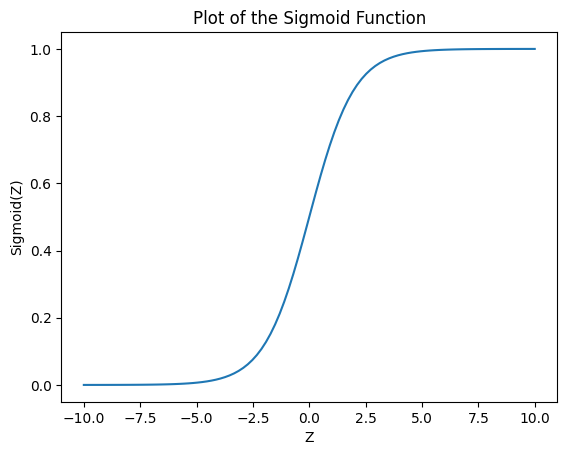

In [34]:
plt.plot(z, sigmoid(z))
plt.title("Plot of the Sigmoid Function")
plt.xlabel("Z")
plt.ylabel("Sigmoid(Z)")
plt.show()

Implementing the forward pass (making predictions)

In [35]:
def forward_pass(X, w, b):

  """
  Make predictions for all examples

  Parameters:
  X: numpy array of shape (n_samples, n_features) - input data
  w: numpy array of shape (n_features,) - weights
  b: float - bias

  Returns:
  predictions: numpy array of shape (n_samples,) - probabilities between 0 and 1

  Steps:
  1. Compute z = X @ w + b
  2. Apply sigmoid to b
  """

  z = X @ w + b
  passed_z = sigmoid(z)

  return passed_z

Sample data

In [36]:
X_1 = np.array([[1, 2], [2, 3], [3, 4]])
w_1 = np.array([0.5, 0.3])
b_1 = -1.0

predictions = forward_pass(X_1, w_1, b_1)
print(f"Predictions: {predictions}")

Predictions: [0.52497919 0.7109495  0.84553473]


The Cost Function: How Wrong Are We?

Implementing the Binary Cross Entropy Loss Function

In [37]:
def bin_cross_entropy(y_true, y_pred):

  """
  Compute Binary Cross Entropy Loss

  Parameters:
  y_true: numpy array of shape (n_samples,) - true labels
  y_pred: numpy array of shape (n_samples,) - predicted probabilities (between 0 and 1)

  Returns:
  loss: float - average loss across all samples

  Formula:
  L(y_true, y_pred) = -1/n * sum(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))

  Added tiny epsilon (1e-15) to avoid log(0)
  """

  epsilon = 1e-15
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

  loss = -1/len(y_true) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

  return loss

Testing on Sample Data

In [38]:
y_true = np.array([1, 0, 1, 0])

y_pred_good = np.array([0.9, 0.1, 0.8, 0.2])

y_pred_bad = np.array([0.1, 0.9, 0.2, 0.8])

print(f"Good prediction loss: {bin_cross_entropy(y_true, y_pred_good)}\n")
print(f"Bad prediction loss: {bin_cross_entropy(y_true, y_pred_bad)}\n")

Good prediction loss: 0.164252033486018

Bad prediction loss: 1.9560115027140732



Implementing Gradient Computation

In [39]:
def compute_grad(X, y, y_pred):

  """
  Compute gradient of the loss wrt weights and bias

  Parameters:
  X: numpy array of shape (n_samples, n_features) - input features
  y: numpy array of shape (n_samples,) - true labels
  y_pred: numpy array of shape (n_samples,) - predicted probabilities

  Returns:
  grad_w: numpy array of shape (n_features,) - gradient for weights
  grad_b: float - gradient for bias

  Formulae:
  grad_w = (1/m) * X^T @ (y_pred - y)
  grad_b = (1/m) * sum(y_pred - y)
  """

  m = X.shape[0] #Number of samples

  grad_w = (1/m) * np.transpose(X) @ (y_pred - y)
  grad_b = (1/m) * np.sum(y_pred - y)

  return grad_w, grad_b

Testing on Sample Data

In [40]:
X_2 = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

y_2 = np.array([0, 0, 1, 1])

w_2 = np.array([0.1, 0.1])
b_2 = 0.0

y_pred_2 = forward_pass(X_2, w_2, b_2)

dw, db = compute_grad(X_2, y_2, y_pred_2)

print(f"Weight gradients: {dw}\n")
print(f"Bias gradient: {db}")

Weight gradients: [-0.08306937  0.06094041]

Bias gradient: 0.14400978070167092


Updating the Weights and Bias

In [41]:
def update_parameters(w, b, grad_w, grad_b, learning_rate):

  """
  Update weights and bias using gradient descent

  Parameters:
  w: numpy array of shape (n_features,) - current weights
  b: float - current bias
  grad_w: numpy array of shape (n_features,) - gradient of loss w.r.t weights
  grad_b: float - gradient of loss w.r.t bias
  learning_rate: float - step size for gradient descent (typically 0.01 to 0.1)

  Returns:
  w_new: numpy array of shape (n_features,) - updated weights
  b_new: float - updated bias

  Update Rule:
  w_new = w - learning_rate * grad_w
  b_new = b - learning_rate * grad_b
  """

  w_new = w - learning_rate * grad_w
  b_new = b - learning_rate * grad_b

  return w_new, b_new

Testing on Sample Data

In [42]:
w = np.array([0.1, 0.1])
b = 0.0

dw_1 = np.array([-0.92, -1.06])
db_1 = -0.14
lr = 0.1

w_new_1, b_new_1 = update_parameters(w, b, dw_1, db_1, lr)

print(f"Old weights: {w}\n")
print(f"Old bias: {b}\n")
print(f"Updated weights: {w_new_1}\n")
print(f"Updated bias: {b_new_1}\n")

Old weights: [0.1 0.1]

Old bias: 0.0

Updated weights: [0.192 0.206]

Updated bias: 0.014000000000000002



The Training Loop - Putting Everything Together

In [57]:
def train(X, y, learning_rate = 0.01, epochs = 1000, early_stop = False, patience = 100,
          min_delta = 1e-4, verbose = True):

  """
  Train the logistic regression model

  Steps for each epoch:
  1. Forward pass: Compute predictions
  2. Compute loss
  3. Compute gradients
  4. Update parameters
  5. Print progress

  Parameters:
  X: numpy array of shape (n_samples, n_features) - training features
  y: numpy array of shape (n_features,) - training labels
  learning_rate: float - step size for gradient descent (default is 0.01)
  epochs: int - number of iterations (default is 1000)
  early_stop: bool - whether to use early stopping (default is False)
  patience: int - number of epochs to wait for improvement (default is 100)
  min_delta: float - minimum change in loss to qualify as improvement (default is 1e-4)
  verbose: bool - whether to print progress (default is True)

  Returns:
  w: numpy array of shape (n_features,) - learned weights
  b: float - learned bias
  losses: list - loss values for each epoch (only for visualization purpose)
  """

  #Initializing all parameters

  n_features = X.shape[1]
  w = np.zeros(n_features)
  b = 0.0

  if early_stop:
    best_loss = float('inf')
    best_w = w.copy()
    best_b = b
    patience_counter = 0

  losses = []

  for epoch in range(epochs):

    #Step 1: Forward Pass (make the prediction)
    y_pred = forward_pass(X, w, b)

    #Step 2: Compute the loss
    loss = bin_cross_entropy(y, y_pred)

    #Step 3: Compute the gradients
    grad_w, grad_b = compute_grad(X, y, y_pred)

    #Step 4: Update the weights and biases
    w, b = update_parameters(w, b, grad_w, grad_b, learning_rate)

    losses.append(loss)

    if early_stop:
      if loss < (best_loss - min_delta):
        best_loss = loss
        best_w = w.copy()
        best_b = b
        patience_counter = 1

      else:
        patience_counter += 1

      if patience_counter >= patience:
        if verbose:
          print(f"\nEarly stopping at epoch: {epoch}.\n")
          print(f"Best loss: {best_loss:.6f}\n")
        return best_w, best_b, losses

    if verbose and epoch % 100 == 0:
      if early_stop:
        print(f"Epoch {epoch}: Loss {loss:.6f} | Best Loss: {best_loss:.6f} | Patience: {patience_counter/patience}\n")

      else:
        print(f"Epoch {epoch}: Loss {loss:.6f}\n")

  if early_stop:
    if verbose:
      print(f"\nCompleted {epochs} epochs | Best loss: {best_loss:.6f}")
    return best_w, best_b, losses

  else:
    if verbose:
      print(f"\nFinal loss: {loss:.6f}")
    return w, b, losses

  return w, b, losses


Testing on Sample Data

In [58]:
np.random.seed(42)

X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5],
                    [5, 6], [6, 7], [7, 8], [8, 9]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1])

#dw_3, db_3, losses = train(X_train, y_train, learning_rate = 0.001, epochs = 3000)
dw_4, db_4, losses_2 = train(X_train, y_train, learning_rate = 0.1, epochs = 3000, early_stop = True, patience = 50)

print(f"Final weights: {dw_4}\n")
print(f"Final bias: {db_4}\n")

Epoch 0: Loss 0.693147 | Best Loss: 0.693147 | Patience: 0.02

Epoch 100: Loss 0.380430 | Best Loss: 0.380430 | Patience: 0.02

Epoch 200: Loss 0.286232 | Best Loss: 0.286232 | Patience: 0.02

Epoch 300: Loss 0.237999 | Best Loss: 0.237999 | Patience: 0.02

Epoch 400: Loss 0.208299 | Best Loss: 0.208299 | Patience: 0.02

Epoch 500: Loss 0.187852 | Best Loss: 0.187852 | Patience: 0.02

Epoch 600: Loss 0.172718 | Best Loss: 0.172718 | Patience: 0.02

Epoch 700: Loss 0.160938 | Best Loss: 0.160938 | Patience: 0.02

Epoch 800: Loss 0.151427 | Best Loss: 0.151427 | Patience: 0.02

Epoch 900: Loss 0.143532 | Best Loss: 0.143532 | Patience: 0.02

Epoch 1000: Loss 0.136834 | Best Loss: 0.136834 | Patience: 0.02

Epoch 1100: Loss 0.131051 | Best Loss: 0.131051 | Patience: 0.02

Epoch 1200: Loss 0.125988 | Best Loss: 0.126036 | Patience: 0.04

Epoch 1300: Loss 0.121502 | Best Loss: 0.121587 | Patience: 0.06

Epoch 1400: Loss 0.117487 | Best Loss: 0.117487 | Patience: 0.02

Epoch 1500: Loss 0.113

Plotting Loss Over Every 100 Epochs

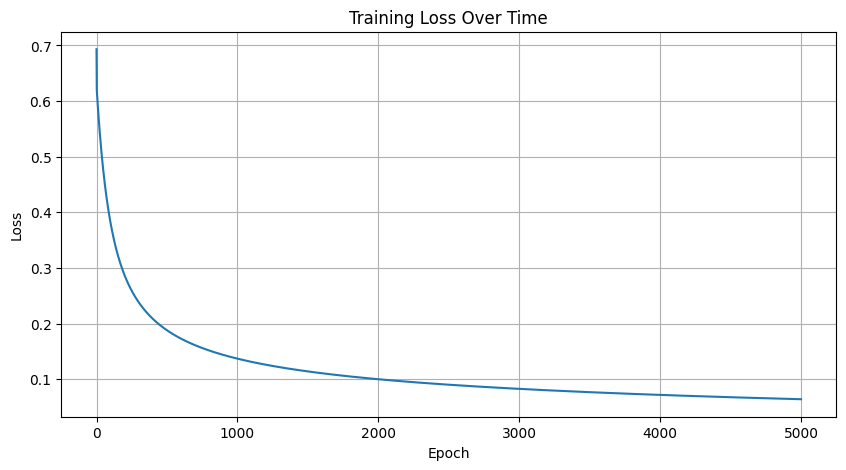

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()


Making Predictions

In [46]:
def predict(X, w, b, threshold = 0.5):

  """
  Make binary predictions

  Parameters:
  X: numpy array of size (n_samples, n_features) - input features
  w: numpy array of size (n_features,) - trained weights
  b: float - trained bias
  threshold: float - descision boundary (defult is 0.5)

  Returns:
  predictions: numpy array of 0s and 1s
  probabilities: numpy array of probabilities
  """

  probabilities = forward_pass(X, w, b)

  predictions = (probabilities >= threshold).astype(int)

  return predictions, probabilities

Testing on Sample Data

In [47]:
y_pred_train, y_prob_train = predict(X_train, w, b)

print("True labels:    ", y_train)
print("Predictions:    ", y_pred_train)
print("Probabilities:  ", np.round(y_prob_train, 3))
print(f"\nAccuracy: {np.mean(y_pred_train == y_train) * 100:.1f}%")

True labels:     [0 0 0 0 1 1 1 1]
Predictions:     [1 1 1 1 1 1 1 1]
Probabilities:   [0.574 0.622 0.668 0.711 0.75  0.786 0.818 0.846]

Accuracy: 50.0%


Testing on New Sample Data

In [48]:
X_new = np.array([[2, 2],
                  [7, 7]])

predictions, probabilities = predict(X_new, w, b)
print("New predictions:", predictions)
print("Probabilities:", probabilities)

New predictions: [1 1]
Probabilities: [0.59868766 0.80218389]


Training with higher learning rate and more epochs

Epoch 0: Loss 0.693147

Epoch 100: Loss 0.380430

Epoch 200: Loss 0.286232

Epoch 300: Loss 0.237999

Epoch 400: Loss 0.208299

Epoch 500: Loss 0.187852

Epoch 600: Loss 0.172718

Epoch 700: Loss 0.160938

Epoch 800: Loss 0.151427

Epoch 900: Loss 0.143532

Epoch 1000: Loss 0.136834

Epoch 1100: Loss 0.131051

Epoch 1200: Loss 0.125988

Epoch 1300: Loss 0.121502

Epoch 1400: Loss 0.117487

Epoch 1500: Loss 0.113863

Epoch 1600: Loss 0.110567

Epoch 1700: Loss 0.107551

Epoch 1800: Loss 0.104776

Epoch 1900: Loss 0.102208

Epoch 2000: Loss 0.099823

Epoch 2100: Loss 0.097598

Epoch 2200: Loss 0.095515

Epoch 2300: Loss 0.093559

Epoch 2400: Loss 0.091716

Epoch 2500: Loss 0.089976

Epoch 2600: Loss 0.088328

Epoch 2700: Loss 0.086764

Epoch 2800: Loss 0.085277

Epoch 2900: Loss 0.083861

Epoch 3000: Loss 0.082508

Epoch 3100: Loss 0.081215

Epoch 3200: Loss 0.079978

Epoch 3300: Loss 0.078790

Epoch 3400: Loss 0.077651

Epoch 3500: Loss 0.076555

Epoch 3600: Loss 0.075500

Epoch 3700: L

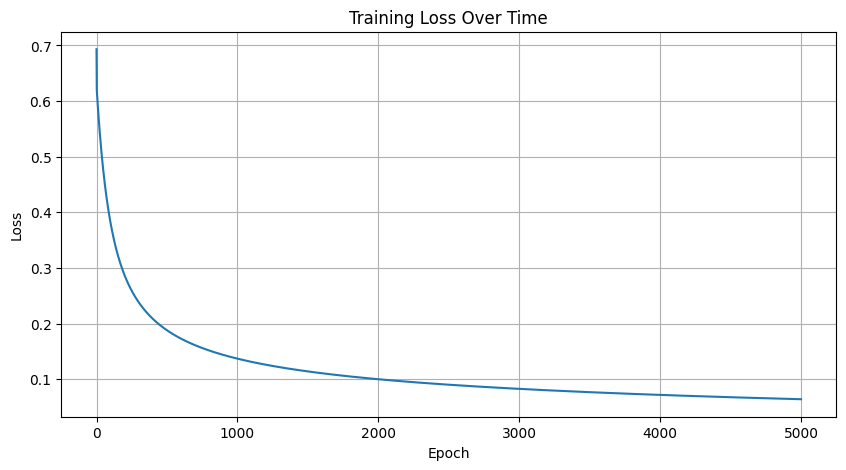


True labels:     [0 0 0 0 1 1 1 1]
Predictions:     [0 0 0 0 1 1 1 1]
Probabilities:   [0.    0.001 0.021 0.233 0.814 0.984 0.999 1.   ]

Accuracy: 100.0%


In [60]:
w, b, losses = train(X_train, y_train, learning_rate=0.1, epochs=5000, early_stop = False)

print(f"\nFinal weights: {w}")
print(f"Final bias: {b}")

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

y_pred_train, y_prob_train = predict(X_train, w, b)

print("\nTrue labels:    ", y_train)
print("Predictions:    ", y_pred_train)
print("Probabilities:  ", np.round(y_prob_train, 3))
print(f"\nAccuracy: {np.mean(y_pred_train == y_train) * 100:.1f}%")

Visualizing the Decision Boundary

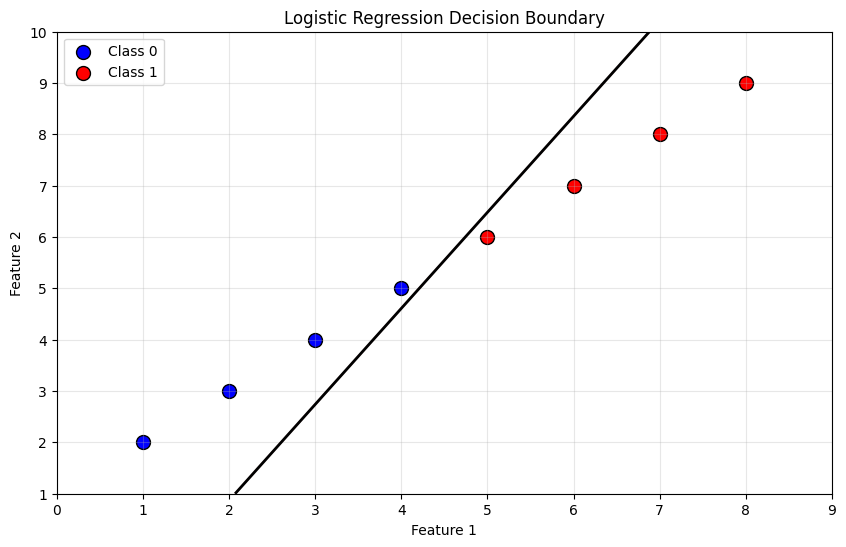

In [61]:
def plot_decision_boundary(X, y, w, b):

  plt.figure(figsize = (10, 6))

  plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c = 'blue', label = 'Class 0', s = 100, edgecolors = 'k')
  plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c = 'red', label = 'Class 1', s = 100, edgecolors = 'k')

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                       (np.linspace(y_min, y_max, 200)))

  Z = forward_pass(np.c_[xx.ravel(), yy.ravel()], w, b)
  Z = Z.reshape(xx.shape)

  plt.contour(xx, yy, Z, levels = [0, 0.5, 1], alpha = 0.3, colors = ['blue', 'red'])
  plt.contour(xx, yy, Z, levels = [0.5], colors = 'black', linewidths = 2)

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Logistic Regression Decision Boundary')
  plt.legend()
  plt.grid(True, alpha = 0.3)
  plt.show()

plot_decision_boundary(X_train, y_train, w, b)

# **Benchmarking against Scikit-Learn**

Loading and Preparing the Dataset

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('breast_cancer_wisconsin.csv')

#Exploring the dataset

print(f"Dataset shape: {df.shape}\n")
print(f"First 5 rows:\n{df.head()}\n")
print(f"Column names: \n{df.columns.tolist()}")
print(f"\nTarget distribution:\n{df['diagnosis'].value_counts()}")


Dataset shape: (569, 33)

First 5 rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst 

Data Preprocessing

In [64]:
#Turning diagnosis into Binary 0/1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

#Cleaning the dataset
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1).values
y = df['diagnosis'].values

print(f"Features shape: {X.shape}\n")
print(f"Target shape: {y.shape}\n")
print(f"Class Distribution - Benign (0): {np.sum(y==0)}, Malignant (1): {np.sum(y==1)}\n")

#Splitting into training data and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2,
                                       random_state = 42, stratify = y)

#Standardizing Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train_scaled.shape[0]}\n")
print(f"Test samples: {X_test_scaled.shape[0]}\n")
print(f"Number of features: {X_train_scaled.shape[1]}\n")

Features shape: (569, 30)

Target shape: (569,)

Class Distribution - Benign (0): 357, Malignant (1): 212

Training samples: 455

Test samples: 114

Number of features: 30



Benchmarking

Epoch 0: Loss 0.693147 | Best Loss: 0.693147 | Patience: 0.01

Epoch 100: Loss 0.103444 | Best Loss: 0.103444 | Patience: 0.01

Epoch 200: Loss 0.085392 | Best Loss: 0.085392 | Patience: 0.01

Epoch 300: Loss 0.077496 | Best Loss: 0.077496 | Patience: 0.01

Epoch 400: Loss 0.072754 | Best Loss: 0.072754 | Patience: 0.01

Epoch 500: Loss 0.069463 | Best Loss: 0.069463 | Patience: 0.01

Epoch 600: Loss 0.066983 | Best Loss: 0.066983 | Patience: 0.01

Epoch 700: Loss 0.065012 | Best Loss: 0.065012 | Patience: 0.01

Epoch 800: Loss 0.063387 | Best Loss: 0.063387 | Patience: 0.01

Epoch 900: Loss 0.062012 | Best Loss: 0.062012 | Patience: 0.01

Epoch 1000: Loss 0.060825 | Best Loss: 0.060825 | Patience: 0.01

Epoch 1100: Loss 0.059783 | Best Loss: 0.059792 | Patience: 0.02

Epoch 1200: Loss 0.058857 | Best Loss: 0.058865 | Patience: 0.02

Epoch 1300: Loss 0.058025 | Best Loss: 0.058033 | Patience: 0.02

Epoch 1400: Loss 0.057271 | Best Loss: 0.057279 | Patience: 0.02

Epoch 1500: Loss 0.056

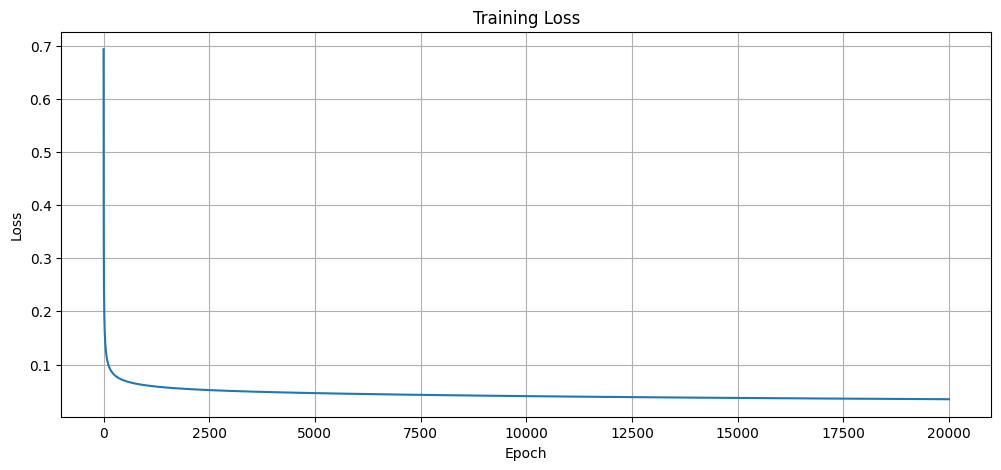

In [71]:
import time

# From scratch model

start_time = time.time()

w_scratch, b_scratch, losses_scratch = train(
    X_train_scaled,
    y_train,
    learning_rate=0.1,
    epochs=20000,
    early_stop=True,
    patience=100,
    min_delta=1e-5,
    verbose=True
)

train_time_scratch = time.time() - start_time

y_pred_scratch, y_prob_scratch = predict(X_test_scaled, w_scratch, b_scratch)
acc_scratch = accuracy_score(y_test, y_pred_scratch)

print(f"Training time: {train_time_scratch:.2f} seconds")
print(f"Test Accuracy: {acc_scratch*100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_scratch))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scratch, target_names=['Benign', 'Malignant']))

#Plotting results
plt.figure(figsize=(12, 5))
plt.plot(losses_scratch)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [72]:
#Scikit-Learn Model

start_time = time.time()

sklearn_model = LogisticRegression(max_iter = 20000, random_state = 42)
sklearn_model.fit(X_train_scaled, y_train)

sklearn_time = time.time() - start_time

y_pred_sklearn = sklearn_model.predict(X_test_scaled)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Training time: {sklearn_time:.2f} seconds")
print(f"Test Accuracy: {acc_sklearn*100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sklearn, target_names=['Benign', 'Malignant']))


Training time: 0.07 seconds
Test Accuracy: 96.49%

Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

